In [1]:
import numpy as np

In [9]:
# Reading the data
data_lines = []
with open('/home/aschioppa/heart.txt','rt') as myFile:
    first_line = True
    for l in myFile:
        values = l.strip().split('\t')
        if first_line:
            names = values
            first_line = False
        else:
            data_lines.append(values)    

In [14]:
for i,k in enumerate(names):
    print i, k

0 "sbp"
1 "tobacco"
2 "ldl"
3 "adiposity"
4 "famhist"
5 "typea"
6 "obesity"
7 "alcohol"
8 "age"
9 "chd"


In [22]:
# Putting the data in numpy frames
dataX = np.zeros((len(data_lines),9),dtype=np.float32)
dataY = np.zeros(len(data_lines),dtype=np.float32)
for i,l in enumerate(data_lines):
    for j, v in enumerate(l):
        if j != 4 and j < 9:
            dataX[i,j] = float(v)
        elif j < 9 and j == 4 :
            if v == '"Present"':
                dataX[i,j] = 1.0
            else:
                dataX[i,j] = 0.0
        else:
            dataY[i] = float(v)

In [34]:
# minibatch descent does not make any sense
dataX.shape

(462, 9)

In [30]:
# train-test split
np.random.seed(2017)
permIdx = np.random.permutation(np.arange(dataX.shape[0]))
trainIdx = permIdx[:int(np.ceil(.80*dataX.shape[0]))]
testIdx = permIdx[trainIdx.shape[0]:]

In [594]:
for l in xrange(dataX.shape[1]):
    dataX[:,l] = (dataX[:,l] - np.mean(dataX[:,l]))/np.std(dataX[:,l])

In [35]:
import tensorflow as tf

In [595]:
X = tf.placeholder(tf.float32, shape = dataX.shape[1], name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

In [596]:
w = tf.Variable(tf.zeros(shape=[dataX.shape[1]]),tf.float32, name = 'w')
Q_inter = tf.Variable(tf.zeros(shape=[dataX.shape[1],dataX.shape[1]]))
b = tf.Variable(0.0, tf.float32, name = 'b')

In [601]:
exp_logit = tf.reshape(tf.exp(tf.constant(-1.0,tf.float32)*(tf.reduce_sum(tf.multiply(w,X))+b
                                                +tf.matmul(tf.matmul(
        tf.reshape(X,shape=(1,dataX.shape[1])),Q_inter
        ),tf.reshape(X,shape=(dataX.shape[1],1))))),shape=())

In [602]:
loss = tf.constant(-1.0,tf.float32)*(Y*tf.log(1.0/(1.0+exp_logit)) +
                                     (tf.constant(1.0,tf.float32)-Y)*tf.log(
        tf.constant(1.0,tf.float32)- 1.0/(1.0+exp_logit)))

In [605]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(loss)

In [606]:
n_epochs=10
loss_list=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())	
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0.0
        writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
        for l in trainIdx:
        # TO-DO: run optimizer + fetch loss_batch
            _,loss_item = sess.run([optimizer,loss],feed_dict = {X : dataX[l,:], Y : 
                                                             dataY[l]})

            total_loss += loss_item
        print('Average loss epoch {0}: {1}'.format(i, total_loss/len(trainIdx)))
        loss_list.append(total_loss/len(trainIdx))
    w_final, b_final, Q_final = sess.run([w,b,Q_inter])
    writer.close()

Average loss epoch 0: 0.646517273018
Average loss epoch 1: 0.591482902942
Average loss epoch 2: 0.564227269932
Average loss epoch 3: 0.546528698071
Average loss epoch 4: 0.533925185856
Average loss epoch 5: 0.524417186247
Average loss epoch 6: 0.516945582638
Average loss epoch 7: 0.510891126947
Average loss epoch 8: 0.505865685914
Average loss epoch 9: 0.501612872625


In [497]:
import matplotlib.pyplot as plt
%matplotlib inline

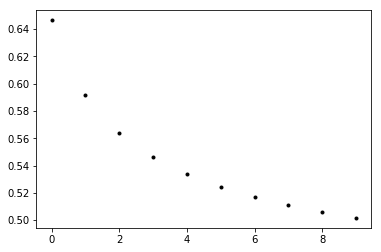

In [607]:
plt.plot(xrange(len(loss_list)),loss_list,'k.')

In [608]:
w_final

array([ 0.16592151,  0.19659819,  0.18591745,  0.12823452,  0.25828993,
        0.07252928, -0.01506092,  0.06254867,  0.26055053], dtype=float32)

In [610]:
b_final

-0.22066577

In [611]:
Q_final

array([[ 0.0145452 ,  0.01196336,  0.03739105, -0.04233496,  0.03006233,
        -0.00860426, -0.02419513, -0.01446278, -0.00909479],
       [ 0.01196337,  0.08180189, -0.02989245,  0.01508842,  0.01420846,
        -0.0645218 ,  0.00343831, -0.01776173, -0.02330137],
       [ 0.03739106, -0.02989244, -0.0032475 ,  0.04502847,  0.0994179 ,
         0.00813584,  0.03164096, -0.07021055,  0.00831294],
       [-0.04233496,  0.01508843,  0.04502847, -0.08869957, -0.00263365,
         0.03389038, -0.01454677, -0.08633513, -0.07601654],
       [ 0.03006234,  0.01420847,  0.09941792, -0.00263366, -0.13218103,
        -0.01285496, -0.02899636,  0.08706722,  0.06347714],
       [-0.00860426, -0.0645218 ,  0.00813585,  0.03389039, -0.01285496,
        -0.05730579,  0.01664799, -0.07912271,  0.02323716],
       [-0.02419513,  0.00343832,  0.03164096, -0.01454676, -0.02899638,
         0.01664799, -0.00150436, -0.0705063 , -0.01573203],
       [-0.01446278, -0.01776173, -0.07021055, -0.08633512,  0

In [612]:
X = tf.placeholder(tf.float32, shape = dataX.shape[1], name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

In [613]:
w = tf.Variable(tf.constant(w_final),tf.float32, name = 'w')
b = tf.Variable(tf.constant(b_final), tf.float32, name = 'b')
Q_inter = tf.Variable(tf.constant(Q_final,shape=(9,9)), tf.float32)

In [614]:
exp_logit = tf.reshape(tf.exp(tf.constant(-1.0,tf.float32)*(tf.reduce_sum(tf.multiply(w,X))+b
                                                +tf.matmul(tf.matmul(
        tf.reshape(X,shape=(1,dataX.shape[1])),Q_inter
        ),tf.reshape(X,shape=(dataX.shape[1],1))))),shape=())

In [582]:
#exp_logit = tf.exp(tf.constant(-1.0,tf.float32)*(tf.reduce_sum(tf.multiply(w,X))+b))

In [615]:
# test the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())
pred = tf.cond(1.0/(1+exp_logit) > .5, lambda: 1.0, lambda: 0.0)
correct_preds = tf.equal(pred, Y)
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(
total_correct = 0.0
for l in trainIdx:
    accuracy_val = sess.run(accuracy, feed_dict={X: dataX[l,:], Y:dataY[l]}) 
    total_correct += accuracy_val

print('Accuracy {0}'.format(total_correct/len(trainIdx)))
sess.close()

Accuracy 0.764864864865


In [616]:
1-dataY[trainIdx].mean()

0.66216215491294861

In [617]:
# test the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())
pred = tf.cond(1.0/(1+exp_logit) > .5, lambda: 1.0, lambda: 0.0)
correct_preds = tf.equal(pred, Y)
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(
total_correct = 0.0
for l in testIdx:
    accuracy_val = sess.run(accuracy, feed_dict={X: dataX[l,:], Y:dataY[l]}) 
    total_correct += accuracy_val

print('Accuracy {0}'.format(total_correct/len(testIdx)))
sess.close()

Accuracy 0.673913043478


In [618]:
1-dataY[testIdx].mean()

0.6195652186870575